# Introduction
## 1. Import Data
First, let's use the pandas library to import the data and store it.

In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

dl1 = pd.read_csv("../data/DL1March_May_24.csv").drop(columns="No.").drop(0)
dl3 = pd.read_csv("../data/DL3March_May_24.csv").drop(columns="No.").drop(0)

print(dl1.head())
# it is quite obvious that the first row of values are outliers, so they are removed

          Date/Time  Cost (£)  Energy (kWh)  Power (kW)  Power Factor  \
1  04/03/2024 12:30      0.14          1.36         2.7         -0.97   
2  04/03/2024 13:00      0.25          2.52         5.0         -0.97   
3  04/03/2024 13:30      0.25          2.52         5.0         -0.97   
4  04/03/2024 14:00      0.25          2.54         5.1         -0.97   
5  04/03/2024 14:30      0.25          2.53         5.1         -0.97   

   Current 1 (amps)  
1              22.9  
2              22.8  
3              22.9  
4              23.1  
5              23.0  


### Key Analyses to Perform
1. **Time-Series Analysis**
    1. Energy Consumption Over Time:
        - Objective: Identify overall trends in energy usage. Are there periods of high consumption? How does energy use vary by day or hour?
        - Analysis: Plot energy consumption over time. Break down by day, week, and month to identify patterns (e.g., higher usage during workdays vs. weekends).
    2. Instantaneous Power and Current:
        - Objective: Examine how power consumption and current vary over time.
        - Analysis: Plot these variables against time. Look for spikes or irregularities that could indicate issues with equipment or unusual activity.
    3. Cost Analysis:
        - Objective: Correlate energy consumption with costs to identify cost-saving opportunities.
        - Analysis: Plot cost versus energy consumption over time. Look for periods where costs may be disproportionately high compared to energy use.

2. **Efficiency Analysis**
    1. Power Factor Analysis:
        - Objective: Assess the efficiency of energy use.
        - Analysis: Evaluate the power factor over time. A lower power factor suggests inefficiency, possibly due to the presence of inductive loads like motors or transformers. Identify periods of low power factor and investigate causes.
    2. Correlation Between Variables:
        - Objective: Understand relationships between power consumption, current, and power factor.
        - Analysis: Use scatter plots or correlation matrices to explore how these variables relate. For example, check if lower power factors correlate with higher currents or power usage.

3. **Peak Demand and Load Analysis**
    1. Identify Peak Power Consumption:
        - Objective: Determine when peak demands occur, which could impact energy costs and infrastructure stress.
        - Analysis: Find the time periods with the highest instantaneous power consumption. Analyze whether these peaks align with specific activities or times of day.
    2. Load Distribution:
        - Objective: Ensure that the electrical load is balanced and within safe operational limits.
        - Analysis: Analyze the distribution of current through the wires over time. Identify any periods where the load is unusually high, indicating potential risks.


check relationship power factor / current / power

richard stevenson - office level 5

## Time-Series Analysis
This section will consist of plotting every data point we have in time in order to establish a relationship between periods of the year and our variables.

Let's only consider DL1 for now. Now, time to plot the raw data.

In [62]:
print(dl1["Date/Time"][0:len(dl1):int(len(dl1)/10)])

1       04/03/2024 12:30
380     12/03/2024 10:00
759     20/03/2024 07:30
1138    28/03/2024 05:00
1517    05/04/2024 02:30
1896    13/04/2024 00:00
2275    20/04/2024 21:30
2654    28/04/2024 19:00
3033    06/05/2024 16:30
3412    14/05/2024 14:00
3791    22/05/2024 11:30
Name: Date/Time, dtype: object


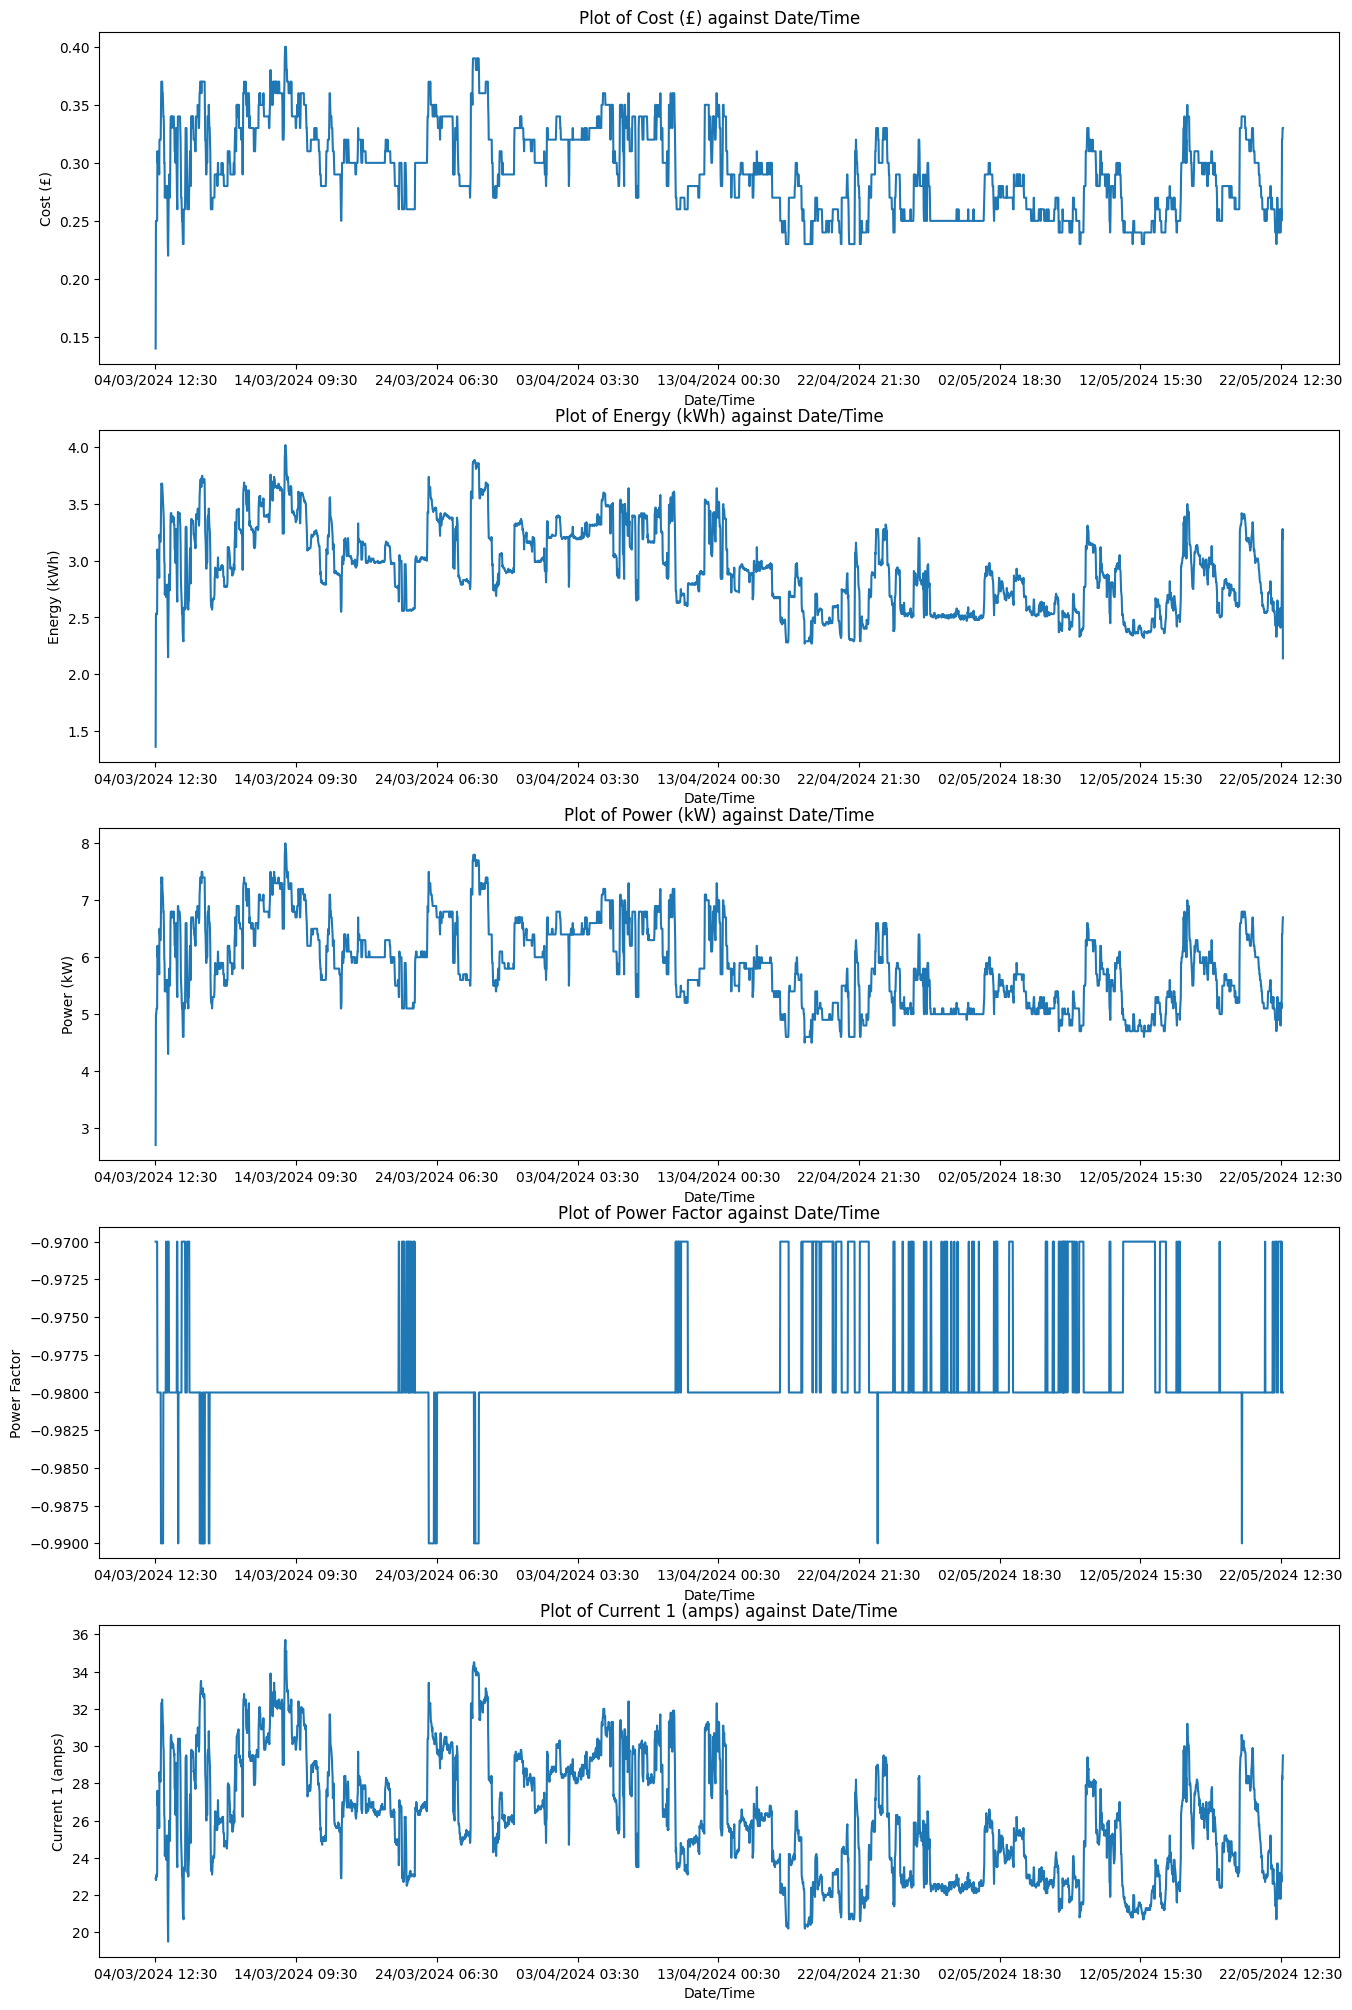

In [66]:
# initialize figure for 5 variables
plt.figure(figsize=(16, 5*5))

xticks_nb = 8
headers = dl1.columns.values.tolist()

for i in range(1, len(headers)):
    plt.subplot(5, 1, i)
    plt.plot(dl1[headers[i]])
    plt.xticks([j for j in range(0, len(dl1), int(len(dl1)/xticks_nb))], labels=dl1["Date/Time"][0:len(dl1):int(len(dl1)/xticks_nb)])
    match headers[i]:
        case "Date/Time":
            print(("Date/Time"))
    plt.xlabel("Date/Time")
    plt.ylabel(headers[i])
    plt.title("Plot of " + headers[i] + " against Date/Time")

plt.show()

A possible idea could be to do an FFT: as we know the sample size is 30 mins, we can get an accurate reading of the frequency of the current, up to a precision of 1 hour^-1.

It is interesting to remove the first element of the FFT, as this essentially removes the constant component. We are now left with only the varying parts

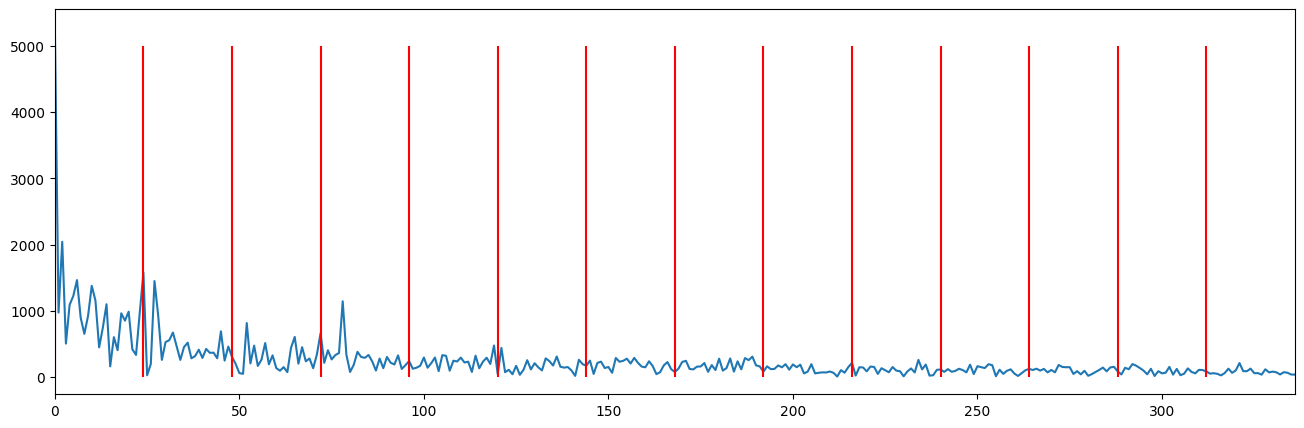

In [48]:
dl1_fft = sp.fft.fft(np.array(dl1["Current 1 (amps)"])) # obtain FFT

# plot real part
plt.figure(figsize=(16, 5))
plt.plot(np.abs(dl1_fft[1:]))
plt.xlim([0, 2*24*7])
plt.vlines(x=range(0, 2*24*7, 24), ymin=0, ymax=5000, colors='r')
plt.show()